In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
add_data_updated = {
    "Size": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "OurMatrix(ms)": [0.718138, 6.52055, 25.608, 65.0286, 132.893, 234.817, 380.081, 557.41, 804.219, 1108.13],
    "Eigen(ms)": [0.0360416, 0.227325, 0.742787, 1.73022, 3.4006, 5.89249, 9.03062, 13.5316, 19.1602, 26.4061]
}

mult_data_updated = {
    "Size": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "OurMatrix(ms)": [0.0031001, 0.0130041, 0.0269959, 0.0486291, 0.0736333, 0.105754, 0.294867, 0.342825, 0.440654, 0.582042],
    "Eigen(ms)": [0.0011416, 0.0050793, 0.0108292, 0.0195292, 0.0313918, 0.0435376, 0.149063, 0.163317, 0.197425, 0.309546]
}

In [10]:
df_add_updated = pd.DataFrame(add_data_updated)
df_mult_updated = pd.DataFrame(mult_data_updated)

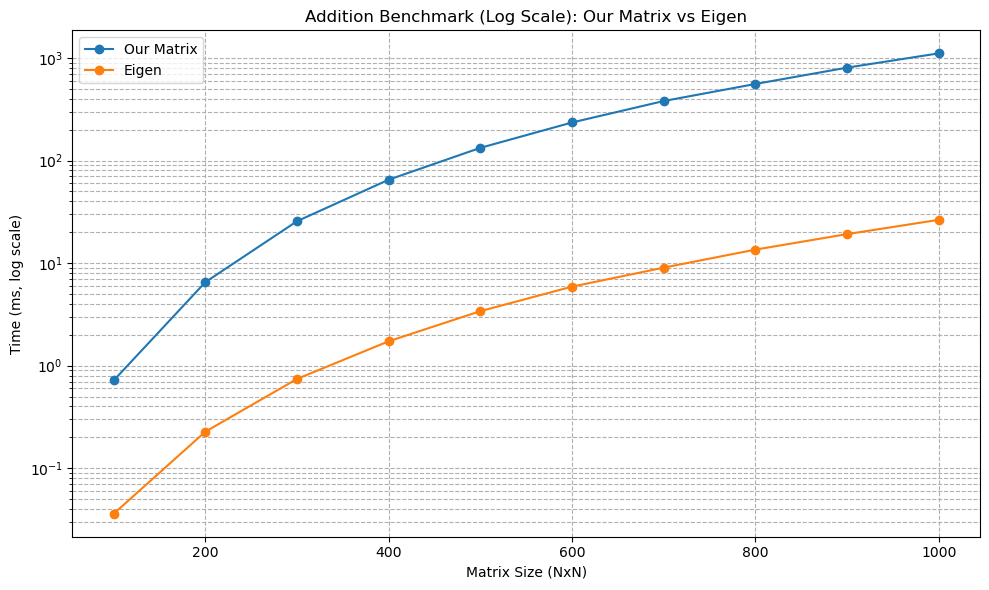

In [11]:
# Plot  Addition (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df_add_updated["Size"], df_add_updated["OurMatrix(ms)"], label="Our Matrix", marker='o')
plt.plot(df_add_updated["Size"], df_add_updated["Eigen(ms)"], label="Eigen", marker='o')
plt.title("Addition Benchmark (Log Scale): Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (ms, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

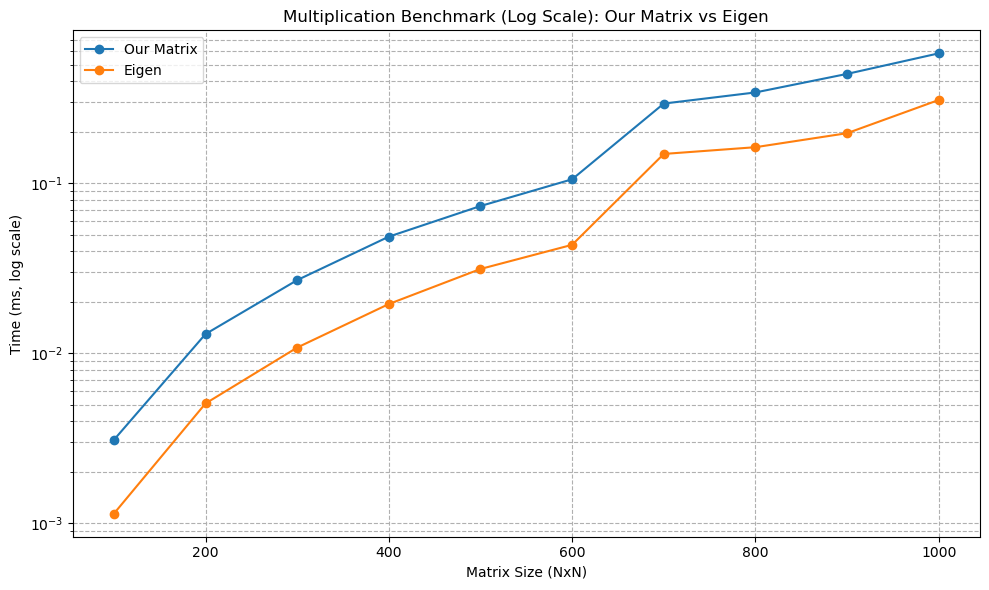

In [12]:
# Plot  Multiplication (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df_mult_updated["Size"], df_mult_updated["OurMatrix(ms)"], label="Our Matrix", marker='o')
plt.plot(df_mult_updated["Size"], df_mult_updated["Eigen(ms)"], label="Eigen", marker='o')
plt.title("Multiplication Benchmark (Log Scale): Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (ms, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

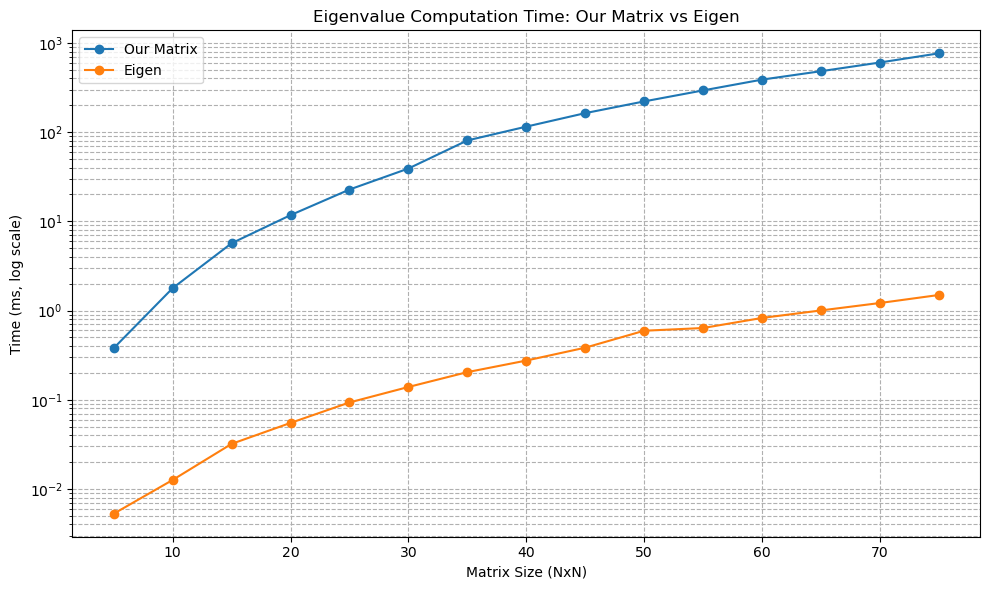

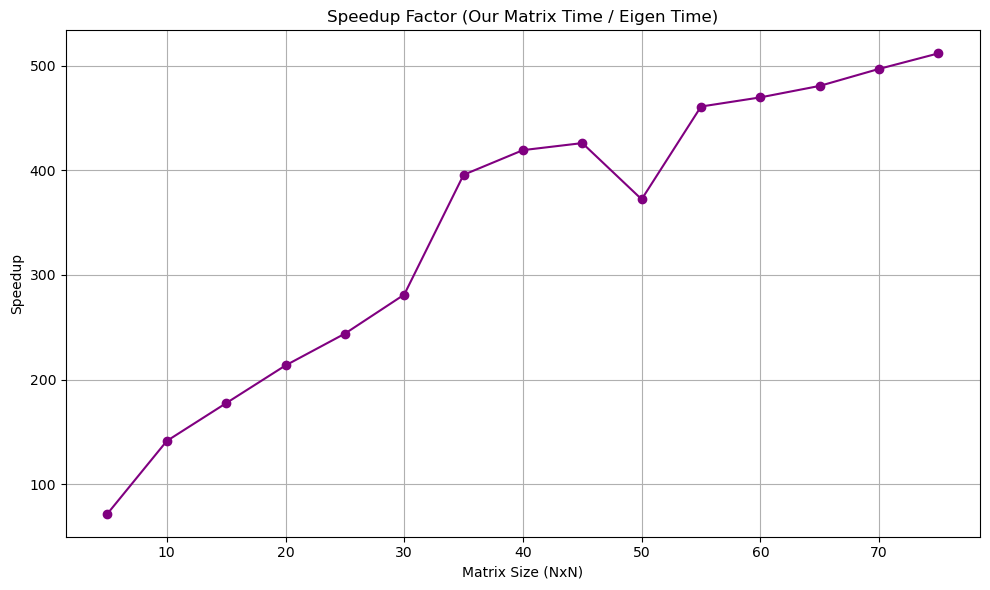

In [13]:

data = {
    "Size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    "OurMatrix(ms)": [0.378675, 1.78125, 5.67697, 11.7319, 22.7177, 39.0737,
                       80.6748, 115.226, 163.259, 220.972, 293.479, 387.792,
                       481.838, 603.26, 764.219],
    "Eigen(ms)": [0.0052752, 0.0126041, 0.0319915, 0.0549499, 0.0931542,
                  0.138946, 0.203867, 0.274812, 0.383213, 0.593538, 0.636671,
                  0.825587, 1.00238, 1.21393, 1.4932]
}

df = pd.DataFrame(data)

# Plot execution times (log scale)
plt.figure(figsize=(10, 6))
plt.plot(df["Size"], df["OurMatrix(ms)"], label="Our Matrix", marker='o')
plt.plot(df["Size"], df["Eigen(ms)"], label="Eigen", marker='o')
plt.title("Eigenvalue Computation Time: Our Matrix vs Eigen")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time (ms, log scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

# Plot speedup (YourTime / EigenTime)
df["Speedup (Our/Eigen)"] = df["OurMatrix(ms)"] / df["Eigen(ms)"]

plt.figure(figsize=(10, 6))
plt.plot(df["Size"], df["Speedup (Our/Eigen)"], marker='o', color='purple')
plt.title("Speedup Factor (Our Matrix Time / Eigen Time)")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Speedup")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
../data/sparse_vs_dense_mult.csv

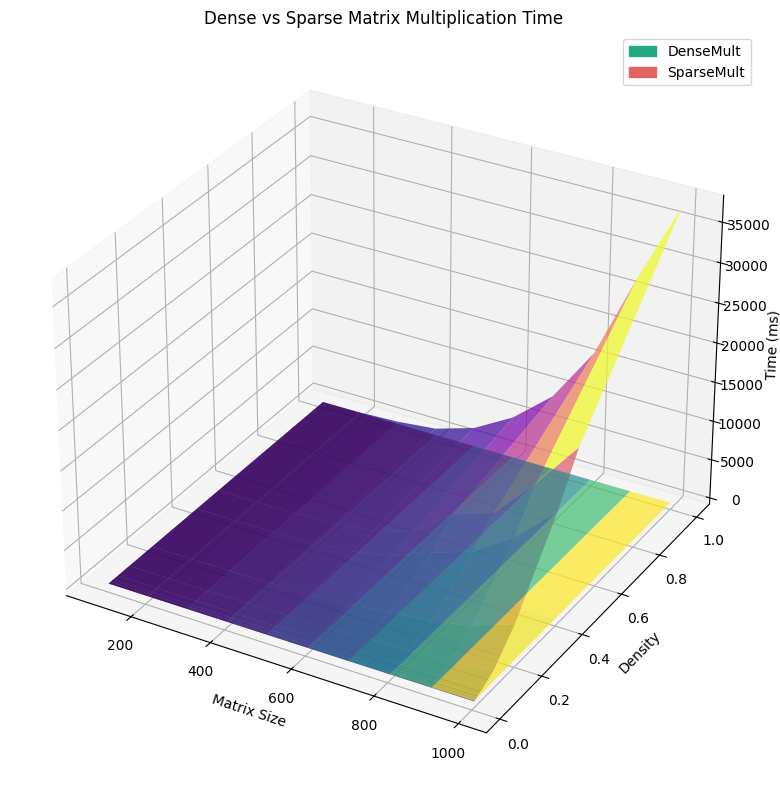

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import numpy as np

# Load the CSV data
df = pd.read_csv("../data/sparse_vs_dense_mult.csv")  # Replace with actual filename

# Extract unique values for size and density
sizes = np.unique(df["Size"].values)
densities = np.unique(df["Density"].values)

# Create a meshgrid
size_grid, density_grid = np.meshgrid(sizes, densities)

# Pivot to get 2D arrays for surface plotting
dense_grid = df.pivot(index="Density", columns="Size", values="DenseMult(ms)").values
sparse_grid = df.pivot(index="Density", columns="Size", values="SparseMult(ms)").values

# Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot dense multiplication surface
dense_surface = ax.plot_surface(size_grid, density_grid, dense_grid, cmap='viridis', alpha=0.7, label='DenseMult')
# Plot sparse multiplication surface
sparse_surface = ax.plot_surface(size_grid, density_grid, sparse_grid, cmap='plasma', alpha=0.7, label='SparseMult')

# Add labels and title
ax.set_title('Dense vs Sparse Matrix Multiplication Time')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Density')
ax.set_zlabel('Time (ms)')

# Custom legend using proxy artists
from matplotlib.patches import Patch
legend_patches = [
    Patch(color=plt.cm.viridis(0.6), label='DenseMult'),
    Patch(color=plt.cm.plasma(0.6), label='SparseMult')
]
ax.legend(handles=legend_patches)

plt.tight_layout()
plt.show()


In [ ]:
../data/sparse_vs_dense_mult.csv

/tmp/ipykernel_9832/3800672442.py:23: RuntimeWarning: divide by zero encountered in log10
  Z_dense_log = np.log10(Z_dense)
/tmp/ipykernel_9832/3800672442.py:24: RuntimeWarning: divide by zero encountered in log10
  Z_sparse_log = np.log10(Z_sparse)


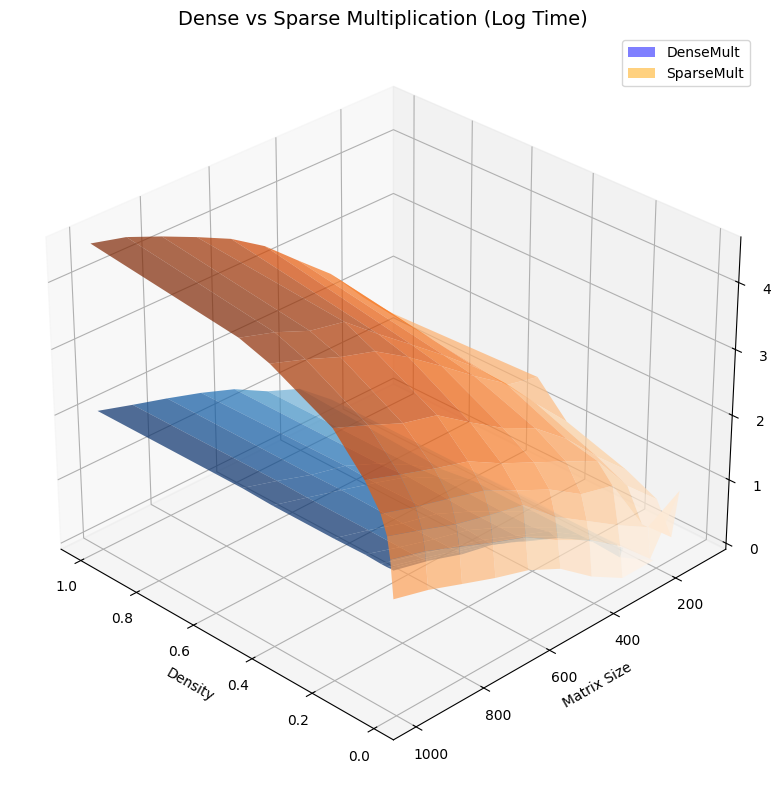

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# Load CSV
df = pd.read_csv("../data/sparse_vs_dense_mult.csv")  # Replace with your actual filename

# Prepare data
sizes = sorted(df["Size"].unique())
densities = sorted(df["Density"].unique())

dense_data = df.pivot(index="Size", columns="Density", values="DenseMult(ms)").reindex(index=sizes, columns=densities)
sparse_data = df.pivot(index="Size", columns="Density", values="SparseMult(ms)").reindex(index=sizes, columns=densities)

X, Y = np.meshgrid(densities, sizes)
Z_dense = dense_data.values
Z_sparse = sparse_data.values

Z_dense[Z_dense == 0] = 0.1
Z_sparse[Z_sparse == 0] = 0.1

Z_dense_log = np.log10(Z_dense)
Z_sparse_log = np.log10(Z_sparse)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Interactive rotation (works automatically in GUI environments)
ax.view_init(elev=30, azim=135)  # Optional: set initial view angle

# Surfaces
surf1 = ax.plot_surface(X, Y, Z_dense_log, cmap="Blues", alpha=0.7)
surf2 = ax.plot_surface(X, Y, Z_sparse_log, cmap="Oranges", alpha=0.7)

# Labels
ax.set_title("Dense vs Sparse Multiplication (Log Time)", fontsize=14)
ax.set_xlabel("Density")
ax.set_ylabel("Matrix Size")
ax.set_zlabel("log10(Time in ms)")

# Legend
dense_proxy = plt.Rectangle((0, 0), 1, 1, fc="blue", alpha=0.5)
sparse_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange", alpha=0.5)
ax.legend([dense_proxy, sparse_proxy], ["DenseMult", "SparseMult"])

plt.tight_layout()
plt.show()


Intersection Points (Size, Density, Time):
Size 400: Density ≈ 0.0175, Time ≈ 6.50 ms
Size 500: Density ≈ 0.0211, Time ≈ 15.79 ms
Size 600: Density ≈ 0.0186, Time ≈ 30.00 ms
Size 700: Density ≈ 0.0197, Time ≈ 39.18 ms
Size 800: Density ≈ 0.0173, Time ≈ 58.34 ms
Size 900: Density ≈ 0.0162, Time ≈ 86.66 ms
Size 1000: Density ≈ 0.0164, Time ≈ 119.45 ms


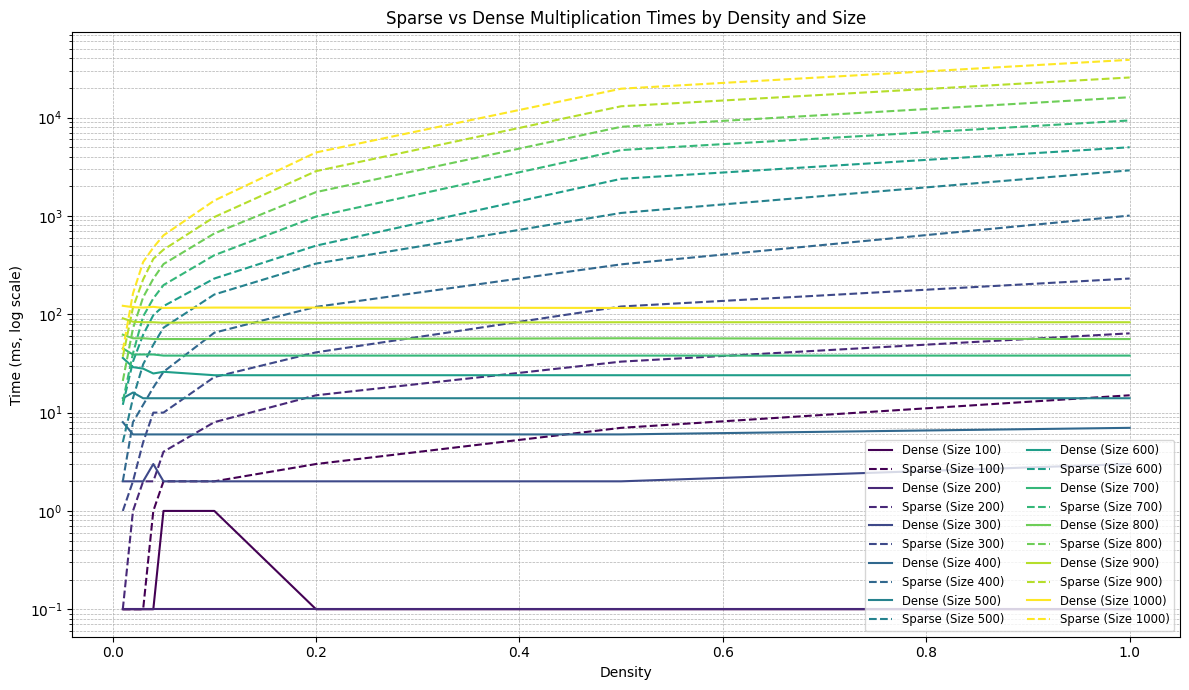

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load CSV
df = pd.read_csv("../data/sparse_vs_dense_mult.csv")

# Unique sizes for grouping and color mapping
sizes = sorted(df["Size"].unique())
colors = cm.viridis(np.linspace(0, 1, len(sizes)))

# Create plot
plt.figure(figsize=(12, 7))

print("Intersection Points (Size, Density, Time):")

# Plot lines and compute intersections
for i, size in enumerate(sizes):
    subset = df[df["Size"] == size].sort_values("Density")
    densities = subset["Density"].values
    dense_times = subset["DenseMult(ms)"].replace(0, 0.1).values
    sparse_times = subset["SparseMult(ms)"].replace(0, 0.1).values

    # Plot Dense and Sparse
    plt.plot(densities, dense_times, label=f"Dense (Size {size})", color=colors[i], linestyle='-')
    plt.plot(densities, sparse_times, label=f"Sparse (Size {size})", color=colors[i], linestyle='--')

    # Detect intersection by sign change in difference
    for j in range(1, len(densities)):
        diff1 = dense_times[j-1] - sparse_times[j-1]
        diff2 = dense_times[j] - sparse_times[j]
        
        if diff1 * diff2 < 0:  # There is a crossing
            # Linear interpolation to estimate intersection
            x1, x2 = densities[j-1], densities[j]
            y1_dense, y2_dense = dense_times[j-1], dense_times[j]
            y1_sparse, y2_sparse = sparse_times[j-1], sparse_times[j]

            # Find intersection point (density where they are equal)
            # Solve: y1_dense + (d - x1)*(y2_dense - y1_dense)/(x2 - x1) = y1_sparse + (d - x1)*(y2_sparse - y1_sparse)/(x2 - x1)
            slope_diff = (y2_dense - y1_dense) - (y2_sparse - y1_sparse)
            if slope_diff == 0:
                continue  # Parallel lines, unlikely but possible
            d_int = x1 + (y1_sparse - y1_dense) / slope_diff * (x2 - x1)
            t_int = y1_dense + (d_int - x1) * (y2_dense - y1_dense) / (x2 - x1)
            
            print(f"Size {size}: Density ≈ {d_int:.4f}, Time ≈ {t_int:.2f} ms")

# Set log scale
plt.yscale('log')

# Labels and title
plt.xlabel("Density")
plt.ylabel("Time (ms, log scale)")
plt.title("Sparse vs Dense Multiplication Times by Density and Size")

# Legend and layout
plt.legend(ncol=2, fontsize='small')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()


Intersection Points (Size, Density, Time):
Size 100: Density ≈ 0.0163, Time ≈ 347.12 ms
Size 300: Density ≈ 0.0161, Time ≈ 2843.38 ms
Size 400: Density ≈ 0.0191, Time ≈ 6548.30 ms
Size 500: Density ≈ 0.0204, Time ≈ 14228.84 ms
Size 600: Density ≈ 0.0201, Time ≈ 24770.41 ms
Size 700: Density ≈ 0.0194, Time ≈ 40131.80 ms
Size 800: Density ≈ 0.0155, Time ≈ 59688.64 ms
Size 900: Density ≈ 0.0158, Time ≈ 83189.23 ms
Size 1000: Density ≈ 0.0154, Time ≈ 116342.32 ms


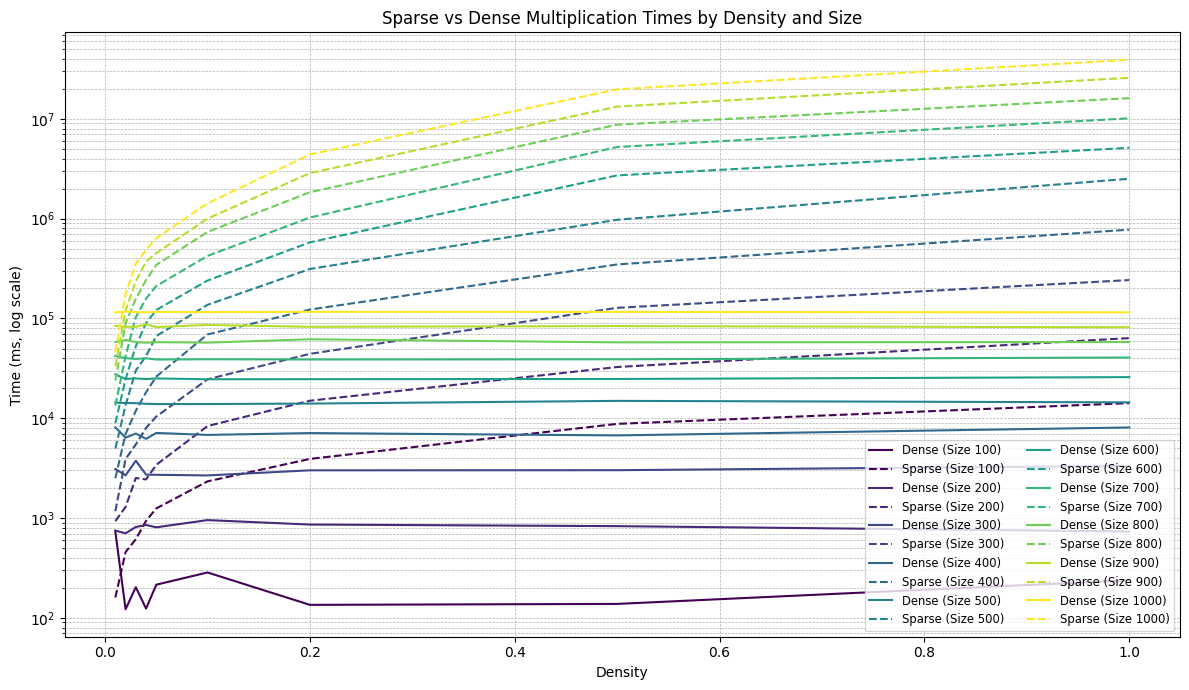

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load CSV
df = pd.read_csv("../data/sparse_serial.csv")

# Unique sizes for grouping and color mapping
sizes = sorted(df["Size"].unique())
colors = cm.viridis(np.linspace(0, 1, len(sizes)))

# Create plot
plt.figure(figsize=(12, 7))

print("Intersection Points (Size, Density, Time):")

# Plot lines and compute intersections
for i, size in enumerate(sizes):
    subset = df[df["Size"] == size].sort_values("Density")
    densities = subset["Density"].values
    dense_times = subset["DenseMult(ms)"].replace(0, 0.1).values
    sparse_times = subset["SparseMult(ms)"].replace(0, 0.1).values

    # Plot Dense and Sparse
    plt.plot(densities, dense_times, label=f"Dense (Size {size})", color=colors[i], linestyle='-')
    plt.plot(densities, sparse_times, label=f"Sparse (Size {size})", color=colors[i], linestyle='--')

    # Detect intersection by sign change in difference
    for j in range(1, len(densities)):
        diff1 = dense_times[j-1] - sparse_times[j-1]
        diff2 = dense_times[j] - sparse_times[j]
        
        if diff1 * diff2 < 0:  # There is a crossing
            # Linear interpolation to estimate intersection
            x1, x2 = densities[j-1], densities[j]
            y1_dense, y2_dense = dense_times[j-1], dense_times[j]
            y1_sparse, y2_sparse = sparse_times[j-1], sparse_times[j]

            # Find intersection point (density where they are equal)
            # Solve: y1_dense + (d - x1)*(y2_dense - y1_dense)/(x2 - x1) = y1_sparse + (d - x1)*(y2_sparse - y1_sparse)/(x2 - x1)
            slope_diff = (y2_dense - y1_dense) - (y2_sparse - y1_sparse)
            if slope_diff == 0:
                continue  # Parallel lines, unlikely but possible
            d_int = x1 + (y1_sparse - y1_dense) / slope_diff * (x2 - x1)
            t_int = y1_dense + (d_int - x1) * (y2_dense - y1_dense) / (x2 - x1)
            
            print(f"Size {size}: Density ≈ {d_int:.4f}, Time ≈ {t_int:.2f} ms")

# Set log scale
plt.yscale('log')

# Labels and title
plt.xlabel("Density")
plt.ylabel("Time (ms, log scale)")
plt.title("Sparse vs Dense Multiplication Times by Density and Size")

# Legend and layout
plt.legend(ncol=2, fontsize='small')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()
